<div align="center">

<h1 align="center">✨ Elmer Andrés Collanqui Casapia ✨</h1>

<p>
💻 Ingeniería en Sistemas e Informática <br>
🚀 Aimara Lab<br>
📍 Universidad Nacional de Moquegua

</p>

<p>
✉️ Contacto: <a href="mailto:ecollanqui@aimaralab.com">ecollanqui@aimaralab.com</a> <br>
🌐 <a href="https://github.com/Mermas-CC" target="_blank">GitHub</a> | <a href="https://www.linkedin.com/in/elmer-andres-collanqui-casapia-977325315" target="_blank">LinkedIn</a>
</p>

</div>


#RED NEURONAL REGRECION LOGISTICA


In [ ]:
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# --- Carga de Datos ---
# URLs de los archivos en GitHub
train_url = 'https://raw.githubusercontent.com/fmplaza/EmoEvent/master/splits/es/train.tsv'
dev_url = 'https://raw.githubusercontent.com/fmplaza/EmoEvent/master/splits/es/dev.tsv'
test_url = 'https://raw.githubusercontent.com/fmplaza/EmoEvent/master/splits/es/test.tsv'

# Cargar los datos en DataFrames de pandas
# El separador es un tabulador (\t)
train_df = pd.read_csv(train_url, sep='\t')
dev_df = pd.read_csv(dev_url, sep='\t')
test_df = pd.read_csv(test_url, sep='\t')


# Eliminar filas con NaN en la columna 'tweet'
train_df = train_df.dropna(subset=['tweet'])
test_df = test_df.dropna(subset=['tweet'])
dev_df = dev_df.dropna(subset=['tweet'])


# Combinamos train y dev para tener más datos de entrenamiento
train_df = pd.concat([train_df, dev_df], ignore_index=True)

print("Datos cargados correctamente.")
print(f"Tamaño del set de entrenamiento: {len(train_df)}")
print(f"Tamaño del set de prueba: {len(test_df)}")

# --- Preprocesamiento del Texto ---
def limpiar_tweet(tweet):
    """
    Función para limpiar el texto de los tweets.
    - Remueve URLs
    - Remueve menciones de usuario (USER)
    - Remueve hashtags (#) pero mantiene el texto
    - Remueve caracteres especiales y números
    - Convierte a minúsculas
    """
    # Remover URLs
    tweet = re.sub(r'https?://\S+|www\.\S+', '', tweet)
    # Remover menciones
    tweet = re.sub(r'USER', '', tweet)
    # Remover el símbolo de hashtag pero mantener la palabra
    tweet = re.sub(r'#', '', tweet)
    # Remover caracteres especiales y números, mantener solo letras y espacios
    tweet = re.sub(r'[^a-zA-ZáéíóúÁÉÍÓÚñÑ\s]', '', tweet)
    # Convertir a minúsculas
    tweet = tweet.lower()
    # Remover espacios extra
    tweet = re.sub(r'\s+', ' ', tweet).strip()
    return tweet

# Aplicar la limpieza a los dataframes
train_df['tweet_limpio'] = train_df['tweet'].apply(limpiar_tweet)
test_df['tweet_limpio'] = test_df['tweet'].apply(limpiar_tweet)

# --- Codificación de Etiquetas ---
# Convertir las etiquetas de texto a números
label_encoder = LabelEncoder()
train_df['emotion_encoded'] = label_encoder.fit_transform(train_df['emotion'])
test_df['emotion_encoded'] = label_encoder.transform(test_df['emotion'])

# Guardar las clases para futuras visualizaciones
emotion_labels = label_encoder.classes_
print(f"\nClases de emociones: {emotion_labels}")
print(f"Etiquetas codificadas: {label_encoder.transform(emotion_labels)}")

# Preparar los datos para los modelos
X_train = train_df['tweet_limpio']
y_train = train_df['emotion_encoded']
X_test = test_df['tweet_limpio']
y_test = test_df['emotion_encoded']

Datos cargados correctamente.
Tamaño del set de entrenamiento: 6567
Tamaño del set de prueba: 1626

Clases de emociones: ['anger' 'disgust' 'fear' 'joy' 'others' 'sadness' 'surprise']
Etiquetas codificadas: [0 1 2 3 4 5 6]


In [ ]:
# Importamos las librerías necesarias para trabajar con datos y modelos de ML
import pandas as pd  # Para manejar los datos en forma de tablas (DataFrames)
import numpy as np   # Para operaciones numéricas
import re            # Para limpiar texto con expresiones regulares
import seaborn as sns  # Para visualizar datos de forma atractiva
import matplotlib.pyplot as plt  # Para crear gráficos

# Librerías de sklearn para preparar datos y evaluar modelos
from sklearn.model_selection import train_test_split  # Para separar datos en train/test
from sklearn.preprocessing import LabelEncoder       # Para convertir etiquetas a números
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score  # Para medir desempeño


In [ ]:
# Cargamos los datos desde GitHub en formato TSV (tab-separated)
train_url = 'https://raw.githubusercontent.com/fmplaza/EmoEvent/master/splits/es/train.tsv'
dev_url = 'https://raw.githubusercontent.com/fmplaza/EmoEvent/master/splits/es/dev.tsv'
test_url = 'https://raw.githubusercontent.com/fmplaza/EmoEvent/master/splits/es/test.tsv'

# Leemos los archivos y los convertimos en DataFrames de pandas
train_df = pd.read_csv(train_url, sep='\t')
dev_df = pd.read_csv(dev_url, sep='\t')
test_df = pd.read_csv(test_url, sep='\t')


In [ ]:
# Eliminamos cualquier fila que no tenga tweet para evitar errores al procesar texto
train_df = train_df.dropna(subset=['tweet'])
dev_df = dev_df.dropna(subset=['tweet'])
test_df = test_df.dropna(subset=['tweet'])

# Combinamos train y dev para tener más ejemplos y entrenar mejor el modelo
train_df = pd.concat([train_df, dev_df], ignore_index=True)

# Mostramos un resumen rápido del tamaño de los datos
print("Datos cargados correctamente.")
print(f"Tamaño del set de entrenamiento: {len(train_df)}")
print(f"Tamaño del set de prueba: {len(test_df)}")


Datos cargados correctamente.
Tamaño del set de entrenamiento: 6567
Tamaño del set de prueba: 1626


In [ ]:
# Definimos una función para limpiar los tweets y dejarlos listos para el modelo
def limpiar_tweet(tweet):
    """
    Limpiamos el texto eliminando ruido:
    - URLs y menciones de usuario
    - Símbolos de hashtags
    - Caracteres especiales y números
    - Pasamos todo a minúsculas y quitamos espacios extras
    """
    tweet = re.sub(r'https?://\S+|www\.\S+', '', tweet)  # quitar URLs
    tweet = re.sub(r'USER', '', tweet)                   # quitar menciones
    tweet = re.sub(r'#', '', tweet)                      # quitar #
    tweet = re.sub(r'[^a-zA-ZáéíóúÁÉÍÓÚñÑ\s]', '', tweet)  # dejar solo letras
    tweet = tweet.lower()                                # pasar a minúsculas
    tweet = re.sub(r'\s+', ' ', tweet).strip()          # quitar espacios extra
    return tweet

# Aplicamos la limpieza a los tweets de train y test
train_df['tweet_limpio'] = train_df['tweet'].apply(limpiar_tweet)
test_df['tweet_limpio'] = test_df['tweet'].apply(limpiar_tweet)


In [ ]:
# Convertimos las etiquetas de emociones a números para que el modelo pueda entenderlas
label_encoder = LabelEncoder()
train_df['emotion_encoded'] = label_encoder.fit_transform(train_df['emotion'])  # entrenamiento
test_df['emotion_encoded'] = label_encoder.transform(test_df['emotion'])       # prueba

# Guardamos los nombres originales de las emociones para visualización o interpretación
emotion_labels = label_encoder.classes_
print(f"\nClases de emociones: {emotion_labels}")
print(f"Etiquetas codificadas: {label_encoder.transform(emotion_labels)}")



Clases de emociones: ['anger' 'disgust' 'fear' 'joy' 'others' 'sadness' 'surprise']
Etiquetas codificadas: [0 1 2 3 4 5 6]


In [ ]:
# Preparamos los datos para el modelo separando características (texto) y etiquetas
X_train = train_df['tweet_limpio']      # tweets limpios para entrenar
y_train = train_df['emotion_encoded']   # etiquetas numéricas correspondientes
X_test = test_df['tweet_limpio']        # tweets de prueba
y_test = test_df['emotion_encoded']     # etiquetas de prueba


In [ ]:
# Importamos herramientas para convertir texto en vectores y entrenar un modelo
from sklearn.feature_extraction.text import TfidfVectorizer  # Para convertir texto en números
from sklearn.linear_model import LogisticRegression           # Modelo de clasificación
from sklearn.metrics import ConfusionMatrixDisplay            # Para mostrar la matriz de confusión


In [ ]:
# Vectorización del texto usando TF-IDF
# TF-IDF asigna más peso a palabras importantes y menos a las muy frecuentes
# max_features=5000 limita el vocabulario a las 5000 palabras más frecuentes
vectorizer = TfidfVectorizer(max_features=5000)

# Ajustamos el vectorizador con los tweets de entrenamiento y transformamos
X_train_tfidf = vectorizer.fit_transform(X_train)

# Transformamos los tweets de prueba usando el mismo vectorizador
# Esto asegura que los datos de prueba tengan las mismas columnas que los de entrenamiento
X_test_tfidf = vectorizer.transform(X_test)


In [ ]:
# Entrenamiento del modelo de Regresión Logística
# class_weight='balanced' ayuda a manejar el desbalance entre clases
# max_iter=1000 asegura que el modelo tenga suficiente iteraciones para converger
model_lr = LogisticRegression(class_weight='balanced', max_iter=1000)

# Entrenamos el modelo con los datos de entrenamiento transformados
model_lr.fit(X_train_tfidf, y_train)


LogisticRegression(class_weight='balanced', max_iter=1000)

## Resultados


In [ ]:
# Evaluación del modelo en los datos de prueba
# Predecimos las emociones de los tweets de prueba
y_pred_lr = model_lr.predict(X_test_tfidf)

# Mostramos un reporte con precisión, recall y f1-score por cada clase
print("Resultados del Modelo 1: Regresión Logística con TF-IDF\n")
print(classification_report(y_test, y_pred_lr, target_names=emotion_labels))

# Guardamos las predicciones en el DataFrame para análisis posterior
test_df['pred_lr'] = y_pred_lr


Resultados del Modelo 1: Regresión Logística con TF-IDF

              precision    recall  f1-score   support

       anger       0.11      0.16      0.13       166
     disgust       0.02      0.03      0.02        33
        fear       0.03      0.05      0.04        21
         joy       0.26      0.29      0.27       348
      others       0.54      0.38      0.44       796
     sadness       0.13      0.15      0.14       195
    surprise       0.04      0.09      0.06        67

    accuracy                           0.29      1626
   macro avg       0.16      0.16      0.16      1626
weighted avg       0.35      0.29      0.31      1626



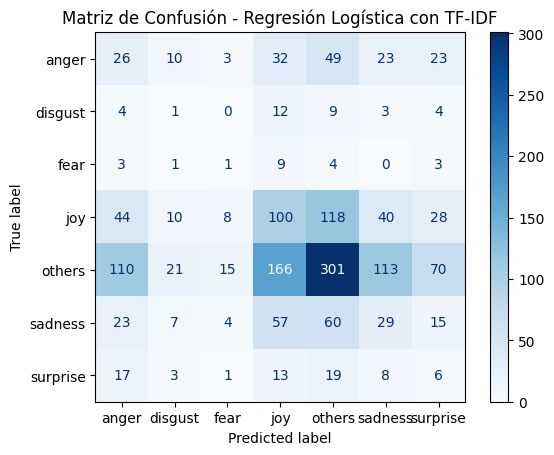

In [ ]:
# Visualización de la matriz de confusión
# Esto nos permite ver cuáles clases se confunden más entre sí
cm_display = ConfusionMatrixDisplay.from_predictions(
    y_test,             # etiquetas reales
    y_pred_lr,          # etiquetas predichas
    display_labels=emotion_labels,  # nombres de las emociones
    cmap=plt.cm.Blues,  # colores del mapa
    normalize=None      # podemos cambiar a 'true' para mostrar porcentajes
)

plt.title("Matriz de Confusión - Regresión Logística con TF-IDF")
plt.show()


#FINE TUNING A MODELO "BETO"

In [ ]:
# --- CONFIGURACIÓN SIMPLIFICADA Y ROBUSTA PARA VERSIONES ANTIGUAS ---
# Definimos los argumentos de entrenamiento para Hugging Face Transformers
training_args = TrainingArguments(
    output_dir='./results_mejorado',     # Carpeta donde se guardarán los resultados del entrenamiento
    num_train_epochs=4,                  # Número de épocas: 4 suele ser un buen balance entre tiempo y desempeño
    learning_rate=2e-5,                  # Tasa de aprendizaje: valores pequeños son comunes para fine-tuning de modelos grandes
    per_device_train_batch_size=16,      # Tamaño de batch para entrenamiento por dispositivo (GPU/CPU)
    per_device_eval_batch_size=64,       # Tamaño de batch para evaluación (puede ser más grande que el de entrenamiento)
    warmup_steps=500,                     # Número de pasos para "calentar" el optimizador al inicio
    weight_decay=0.01,                    # Regularización para evitar sobreajuste
    logging_dir='./logs_mejorado',        # Carpeta donde se guardarán los logs de entrenamiento
    logging_steps=200,                     # Cada cuántos pasos se imprime información de entrenamiento

    # Configuración compatible con versiones más antiguas de Transformers
    do_eval=True,                          # Habilita la evaluación durante el entrenamiento
    eval_steps=200,                        # Cada cuántos pasos se realiza la evaluación
    save_steps=200,                        # Cada cuántos pasos se guardará el checkpoint del modelo
)

# Inicializamos el Trainer de Hugging Face
# Trainer se encarga de manejar el entrenamiento, evaluación y guardado automático del modelo
trainer = Trainer(
    model=model_beto,                       # El modelo que queremos entrenar (p. ej., BETO)
    args=training_args,                     # Los argumentos de entrenamiento definidos arriba
    train_dataset=train_dataset_tokenized,  # Dataset de entrenamiento ya tokenizado
    eval_dataset=test_dataset_tokenized,    # Dataset de evaluación ya tokenizado
    compute_metrics=compute_metrics,        # Función para calcular métricas (accuracy, F1, etc.)
    # No se usan callbacks aquí (como EarlyStopping) para compatibilidad con versiones antiguas
)


# Entrenamos el modelo
# Esta llamada ejecuta el ciclo de entrenamiento completo usando los parámetros configurados
trainer.train()


Using the `WANDB_DISABLED` environment variable is deprecated and will be removed in v5. Use the --report_to flag to control the integrations used for logging result (for instance --report_to none).


Step,Training Loss
200,1.495700
400,1.006300
600,0.876400
800,0.782000
1000,0.578500
1200,0.543700
1400,0.402100
1600,0.354700


TrainOutput(global_step=1644, training_loss=0.7435134553561246, metrics={'train_runtime': 1279.2899, 'train_samples_per_second': 20.533, 'train_steps_per_second': 1.285, 'total_flos': 1727927868902400.0, 'train_loss': 0.7435134553561246, 'epoch': 4.0})

##Resultados

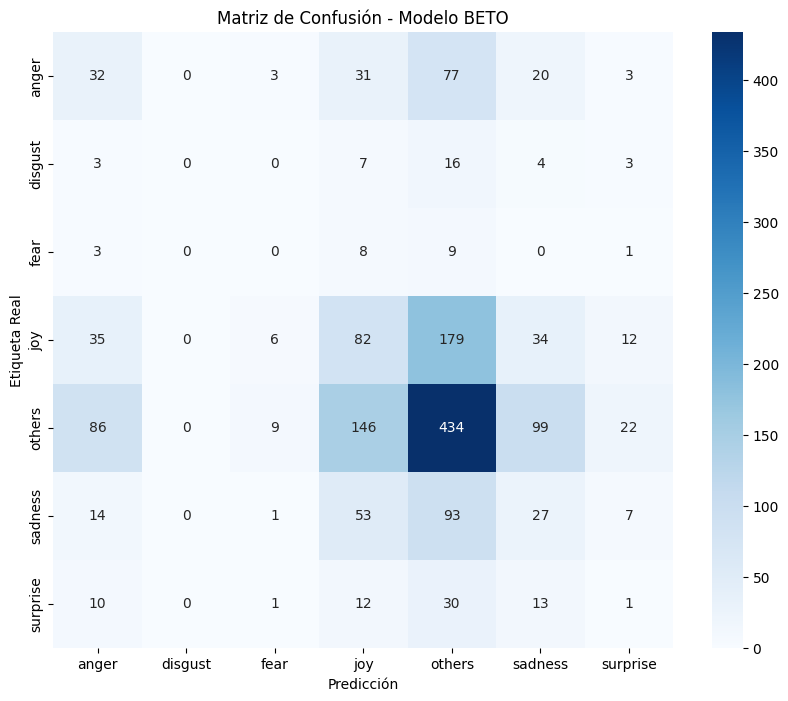

In [ ]:
# Vamos a usar las predicciones generadas por el modelo BETO
# Se asume que la columna 'pred_beto' ya existe en test_df
y_pred_best_model = test_df['pred_beto']

# --- Matriz de Confusión ---
# La matriz de confusión nos permite ver qué clases se confunden más
# filas = etiquetas reales, columnas = predicciones del modelo
cm = confusion_matrix(y_test, y_pred_best_model)

# Configuramos el tamaño de la figura para que se vea clara
plt.figure(figsize=(10, 8))

# Creamos un mapa de calor con los valores de la matriz de confusión
# annot=True para mostrar los números dentro de cada celda

# xticklabels y yticklabels muestran los nombres de las emociones
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=emotion_labels, yticklabels=emotion_labels)

# Etiquetas de los ejes y título del gráfico
plt.xlabel('Predicción')
plt.ylabel('Etiqueta Real')
plt.title('Matriz de Confusión - Modelo BETO')

# Mostramos la matriz de confusión
plt.show()


/tmp/ipython-input-694506854.py:6: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  event_accuracy = test_df.groupby('event').apply(
/tmp/ipython-input-694506854.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=event_accuracy.index, y=event_accuracy.values, palette='viridis')



--- Análisis de Precisión por Evento ---

event
LaLiga             0.462185
GretaThunberg      0.438849
SpainElection      0.389908
Venezuela          0.388889
ChampionsLeague    0.379310
WorldBookDay       0.316667
GameOfThrones      0.301370
NotreDame          0.240000
dtype: float64


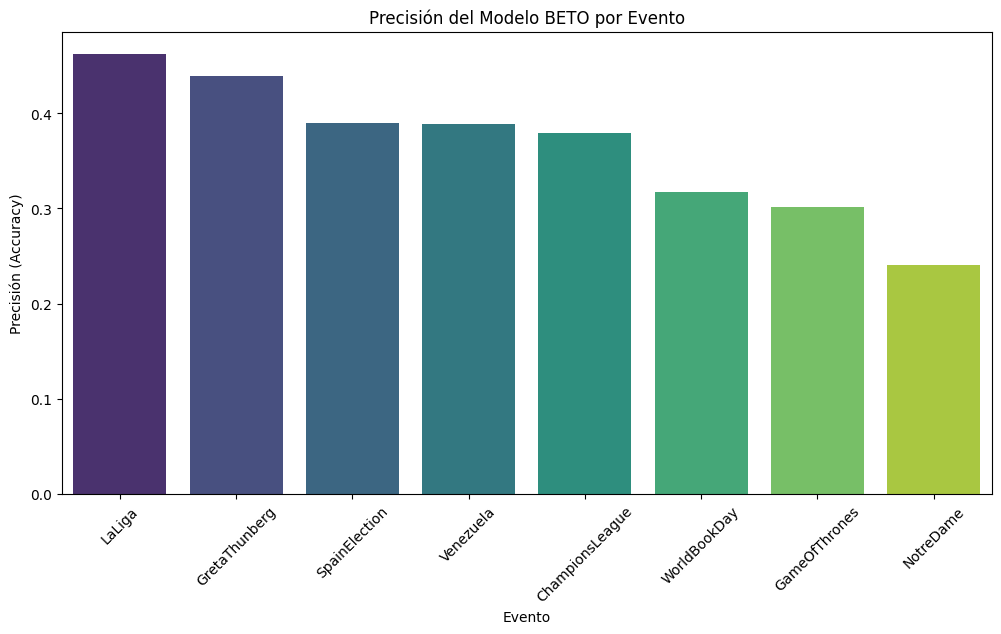

In [ ]:
# Añadimos la emoción predicha (en texto) y la real al dataframe
test_df['emotion_pred_text'] = label_encoder.inverse_transform(y_pred_best_model)
test_df['emotion_real_text'] = label_encoder.inverse_transform(y_test)

# Agrupamos por evento y calculamos la precisión para cada uno
event_accuracy = test_df.groupby('event').apply(
    lambda df: accuracy_score(df['emotion_real_text'], df['emotion_pred_text'])
)

# Ordenamos para una mejor visualización
event_accuracy = event_accuracy.sort_values(ascending=False)

print("\n--- Análisis de Precisión por Evento ---\n")
print(event_accuracy)

# Visualización
plt.figure(figsize=(12, 6))
sns.barplot(x=event_accuracy.index, y=event_accuracy.values, palette='viridis')
plt.title('Precisión del Modelo BETO por Evento')
plt.xlabel('Evento')
plt.ylabel('Precisión (Accuracy)')
plt.xticks(rotation=45)
plt.show()

In [ ]:
!pip install google-generativeai tqdm matplotlib scikit-learn pandas


#MODELO EXISTENTE "GEMINI 2.5 FLASH"

##Especificando prompt con ejemplos

In [ ]:
# Importamos librerías necesarias
import google.generativeai as genai  # API de modelos generativos de Google
import time                          # Para medir tiempos si se desea
from tqdm import tqdm                 # Barra de progreso para loops largos
import matplotlib.pyplot as plt       # Para graficar la matriz de confusión
from sklearn.preprocessing import LabelEncoder  # Convertir etiquetas a números
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay  # Evaluación

from google.colab import userdata  # Para obtener API Key de manera segura


In [ ]:
# Configuramos la API Key de Google generative AI
GOOGLE_API_KEY = userdata.get('GOOGLE_API_KEY')
genai.configure(api_key=GOOGLE_API_KEY)


In [ ]:
# Definimos las emociones posibles
emotion_labels = ['anger', 'disgust', 'fear', 'joy', 'sadness', 'surprise', 'others']

# Creamos ejemplos guía para cada emoción
# Esto ayuda al modelo a entender el contexto de cada categoría
ejemplos = {
    'anger': "No conocen ni la Iglesia que está en el barrio y esta llorando por la catedral de HASHTAG",
    'disgust': "Es una mierda lo que paso en HASHTAG pero please dejen de subir su foto en HASHTAG 🙄😴",
    'fear': "Tengo miedo que algo así vuelva a suceder en la ciudad",
    'joy': "Hoy grabé un vídeo durante mi primer viaje a HASHTAG. Fue un momento mágico.",
    'sadness': "Acabo de ver la gran pérdida que estamos teniendo en estos momentos en HASHTAG... La catedral de HASHTAG está en llamas 😭",
    'surprise': "Hoy el mundo occidental está “shockeado” con el incendio en la Catedral de Notre Dame. Impresionante la sensación que viví",
    'others': "No aplica a ninguna de las emociones anteriores"
}


In [ ]:
# --- Clasificación Zero-Shot ---
# Configuración de seguridad para que el modelo evite generar contenido dañino
safety_settings = [
    {"category": "HARM_CATEGORY_HARASSMENT", "threshold": "BLOCK_NONE"},
    {"category": "HARM_CATEGORY_HATE_SPEECH", "threshold": "BLOCK_NONE"},
]

# Inicializamos el modelo generativo Gemini
model_gemini = genai.GenerativeModel('gemini-2.5-flash', safety_settings=safety_settings)


In [ ]:
# Función que clasifica un tweet usando ejemplos guía
def clasificar_con_gemini(tweet):
    """
    Construye un prompt para Gemini usando ejemplos de cada emoción
    y devuelve la emoción predicha o 'others' si no coincide.
    """
    lista_emociones = ", ".join(emotion_labels)
    prompt = f"""
    Clasifica el siguiente tweet en una de las siguientes emociones: {lista_emociones}.
    A continuación se muestran ejemplos de cada emoción para guiarte:
    """
    for emo, ejemplo in ejemplos.items():
        prompt += f"\n{emo}: {ejemplo}"

    prompt += f"\n\nTweet: \"{tweet}\"\nEmoción:"

    try:
        # Genera la predicción del modelo
        response = model_gemini.generate_content(prompt)
        predicted_emotion = response.text.strip().lower()
        # Validamos que la emoción esté dentro de las etiquetas
        if predicted_emotion in emotion_labels:
            return predicted_emotion
        else:
            return 'others'
    except Exception as e:
        # En caso de error con la API, devolvemos 'others'
        print(f"Error en la API: {e}")
        return 'others'


In [ ]:
# --- Ejecución y Evaluación ---
# Tomamos una muestra de 200 tweets del conjunto de prueba para pruebas rápidas
sample_test_df = test_df.sample(n=200, random_state=42)

# Clasificamos cada tweet usando Gemini y mostramos barra de progreso
y_pred_gemini_text = [clasificar_con_gemini(tweet) for tweet in tqdm(sample_test_df['tweet'])]
y_test_sample = sample_test_df['emotion']

# Convertimos etiquetas de texto a números para poder usar métricas de sklearn
label_encoder = LabelEncoder()
label_encoder.fit(emotion_labels)
y_pred_gemini = label_encoder.transform(y_pred_gemini_text)
y_test_gemini = label_encoder.transform(y_test_sample)

# Mostramos reporte de clasificación con precisión, recall y f1-score
print("\nResultados del Modelo 3: Gemini (Zero-Shot) sobre 200 muestras\n")
print(classification_report(y_test_gemini, y_pred_gemini, target_names=emotion_labels))

# --- Matriz de Confusión ---
# Construimos y graficamos la matriz de confusión
# Esto permite visualizar qué emociones se confunden más
cm = confusion_matrix(y_test_gemini, y_pred_gemini)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=emotion_labels)

plt.figure(figsize=(10,8))
disp.plot(cmap=plt.cm.Blues, xticks_rotation=45)
plt.title("Matriz de Confusión - Modelo Gemini (Zero-Shot)")
plt.show()


100%|██████████| 200/200 [19:30<00:00,  5.85s/it]


Resultados del Modelo 3: Gemini (Zero-Shot) sobre 200 muestras

              precision    recall  f1-score   support

       anger       0.00      0.00      0.00        14
     disgust       0.00      0.00      0.00         4
        fear       0.00      0.00      0.00         5
         joy       0.06      0.02      0.03        41
     sadness       0.54      0.80      0.64       105
    surprise       0.18      0.09      0.12        22
      others       0.00      0.00      0.00         9

    accuracy                           0.43       200
   macro avg       0.11      0.13      0.11       200
weighted avg       0.31      0.43      0.36       200




/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


<Figure size 1000x800 with 0 Axes>

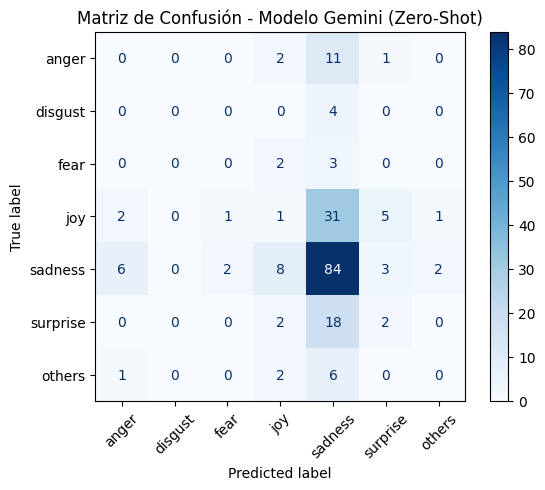

In [ ]:
import google.generativeai as genai
import time
from tqdm import tqdm
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

from google.colab import userdata

# Configurar API Key de Google
GOOGLE_API_KEY = userdata.get('GOOGLE_API_KEY')
genai.configure(api_key=GOOGLE_API_KEY)

# Lista de emociones
emotion_labels = ['anger', 'disgust', 'fear', 'joy', 'sadness', 'surprise', 'others']

# Ejemplos guía para cada emoción
ejemplos = {
    'anger': "No conocen ni la Iglesia que está en el barrio y esta llorando por la catedral de HASHTAG",
    'disgust': "Es una mierda lo que paso en HASHTAG pero please dejen de subir su foto en HASHTAG 🙄😴",
    'fear': "Tengo miedo que algo así vuelva a suceder en la ciudad",
    'joy': "Hoy grabé un vídeo durante mi primer viaje a HASHTAG. Fue un momento mágico.",
    'sadness': "Acabo de ver la gran pérdida que estamos teniendo en estos momentos en HASHTAG... La catedral de HASHTAG está en llamas 😭",
    'surprise': "Hoy el mundo occidental está “shockeado” con el incendio en la Catedral de Notre Dame. Impresionante la sensación que viví",
    'others': "No aplica a ninguna de las emociones anteriores"
}

# --- Clasificación Zero-Shot ---
# Configuración de seguridad del modelo
safety_settings = [
    {"category": "HARM_CATEGORY_HARASSMENT", "threshold": "BLOCK_NONE"},
    {"category": "HARM_CATEGORY_HATE_SPEECH", "threshold": "BLOCK_NONE"},
]

model_gemini = genai.GenerativeModel('gemini-2.5-flash', safety_settings=safety_settings)

# Función para clasificar un tweet con ejemplos guía
def clasificar_con_gemini(tweet):
    lista_emociones = ", ".join(emotion_labels)
    prompt = f"""
    Clasifica el siguiente tweet en una de las siguientes emociones: {lista_emociones}.
    A continuación se muestran ejemplos de cada emoción para guiarte:
    """
    for emo, ejemplo in ejemplos.items():
        prompt += f"\n{emo}: {ejemplo}"

    prompt += f"\n\nTweet: \"{tweet}\"\nEmoción:"

    try:
        response = model_gemini.generate_content(prompt)
        predicted_emotion = response.text.strip().lower()
        if predicted_emotion in emotion_labels:
            return predicted_emotion
        else:
            return 'others'
    except Exception as e:
        print(f"Error en la API: {e}")
        return 'others'

# --- Ejecución y Evaluación ---
sample_test_df = test_df.sample(n=200, random_state=42)

y_pred_gemini_text = [clasificar_con_gemini(tweet) for tweet in tqdm(sample_test_df['tweet'])]
y_test_sample = sample_test_df['emotion']

# Codificar etiquetas a formato numérico
label_encoder = LabelEncoder()
label_encoder.fit(emotion_labels)
y_pred_gemini = label_encoder.transform(y_pred_gemini_text)
y_test_gemini = label_encoder.transform(y_test_sample)

# Reporte de clasificación
print("\nResultados del Modelo 3: Gemini (Zero-Shot) sobre 200 muestras\n")
print(classification_report(y_test_gemini, y_pred_gemini, target_names=emotion_labels))

# --- Matriz de Confusión ---
cm = confusion_matrix(y_test_gemini, y_pred_gemini)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=emotion_labels)

plt.figure(figsize=(10,8))
disp.plot(cmap=plt.cm.Blues, xticks_rotation=45)
plt.title("Matriz de Confusión - Modelo Gemini (Zero-Shot)")
plt.show()


##Prompt sin ejemplos

In [ ]:
# Importamos librerías necesarias
import google.generativeai as genai  # API de modelos generativos de Google
import time                          # Para medir tiempos si se desea
from tqdm import tqdm                 # Barra de progreso para loops largos
import matplotlib.pyplot as plt       # Para graficar la matriz de confusión
from sklearn.preprocessing import LabelEncoder  # Convertir etiquetas a números
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay  # Evaluación

from google.colab import userdata  # Para obtener API Key de manera segura


In [ ]:
# Configuramos la API Key de Google generative AI
GOOGLE_API_KEY = userdata.get('GOOGLE_API_KEY')
genai.configure(api_key=GOOGLE_API_KEY)


In [ ]:
# Definimos las emociones posibles que queremos predecir
emotion_labels = ['anger', 'disgust', 'fear', 'joy', 'sadness', 'surprise', 'others']


In [ ]:
# --- Clasificación Zero-Shot ---
# Configuración de seguridad para que el modelo evite generar contenido dañino
safety_settings = [
    {"category": "HARM_CATEGORY_HARASSMENT", "threshold": "BLOCK_NONE"},
    {"category": "HARM_CATEGORY_HATE_SPEECH", "threshold": "BLOCK_NONE"},
]

# Inicializamos el modelo generativo Gemini
model_gemini = genai.GenerativeModel('gemini-2.5-flash', safety_settings=safety_settings)


In [ ]:
# Función que clasifica un tweet sin usar ejemplos guía
def clasificar_con_gemini(tweet):
    """
    Construye un prompt para Gemini indicando únicamente las emociones posibles,
    y devuelve la emoción predicha o 'others' si no coincide.
    """
    lista_emociones = ", ".join(emotion_labels)
    prompt = f"""
    Clasifica el siguiente tweet en una de las siguientes emociones: {lista_emociones}.
    Responde únicamente con la palabra de la emoción.
    Tweet: "{tweet}"
    Emoción:
    """
    try:
        # Genera la predicción del modelo
        response = model_gemini.generate_content(prompt)
        predicted_emotion = response.text.strip().lower()
        # Validamos que la emoción esté dentro de las etiquetas
        if predicted_emotion in emotion_labels:
            return predicted_emotion
        else:
            return 'others'
    except Exception as e:
        # En caso de error con la API, devolvemos 'others'
        print(f"Error en la API: {e}")
        return 'others'


100%|██████████| 200/200 [15:27<00:00,  4.64s/it]


Resultados del Modelo 3: Gemini (Zero-Shot) sobre 200 muestras

              precision    recall  f1-score   support

       anger       0.12      0.29      0.17        14
     disgust       0.00      0.00      0.00         4
        fear       0.00      0.00      0.00         5
         joy       0.22      0.49      0.31        41
     sadness       0.54      0.07      0.12       105
    surprise       0.18      0.23      0.20        22
      others       0.00      0.00      0.00         9

    accuracy                           0.18       200
   macro avg       0.15      0.15      0.11       200
weighted avg       0.36      0.18      0.16       200



<Figure size 1000x800 with 0 Axes>

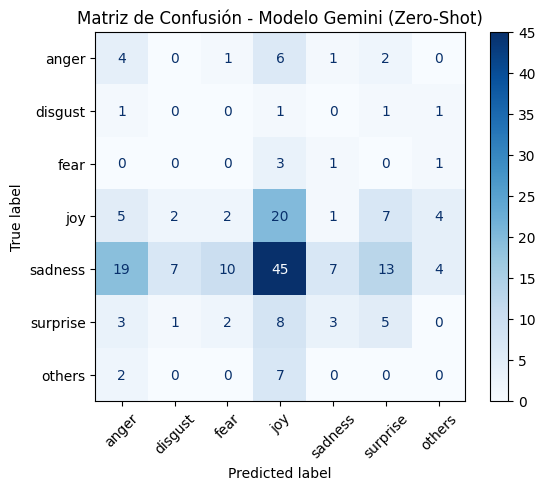

In [ ]:
# --- Ejecución y Evaluación ---
# Tomamos una muestra de 200 tweets del conjunto de prueba para pruebas rápidas
sample_test_df = test_df.sample(n=200, random_state=42)

# Clasificamos cada tweet usando Gemini y mostramos barra de progreso
y_pred_gemini_text = [clasificar_con_gemini(tweet) for tweet in tqdm(sample_test_df['tweet'])]
y_test_sample = sample_test_df['emotion']

# Convertimos etiquetas de texto a números para poder usar métricas de sklearn
label_encoder = LabelEncoder()
label_encoder.fit(emotion_labels)
y_pred_gemini = label_encoder.transform(y_pred_gemini_text)
y_test_gemini = label_encoder.transform(y_test_sample)

# Mostramos reporte de clasificación con precisión, recall y f1-score
print("\nResultados del Modelo 3: Gemini (Zero-Shot) sobre 200 muestras\n")
print(classification_report(y_test_gemini, y_pred_gemini, target_names=emotion_labels))

# --- Matriz de Confusión ---
# Construimos y graficamos la matriz de confusión
# Esto permite visualizar qué emociones se confunden más
cm = confusion_matrix(y_test_gemini, y_pred_gemini)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=emotion_labels)

plt.figure(figsize=(10,8))
disp.plot(cmap=plt.cm.Blues, xticks_rotation=45)
plt.title("Matriz de Confusión - Modelo Gemini (Zero-Shot)")
plt.show()




In [ ]:
# Filtramos para ver solo los errores
errores_df = test_df[test_df['emotion_real_text'] != test_df['emotion_pred_text']]

print("\n--- Ejemplos de Clasificaciones Incorrectas ---\n")

# Muestra 5 errores aleatorios
pd.set_option('display.max_colwidth', None) # para ver el texto completo
print(errores_df[['tweet', 'emotion_real_text', 'emotion_pred_text']].sample(5))


--- Ejemplos de Clasificaciones Incorrectas ---

                                                                                                                                                                                                                                                                                            tweet  \
573   Es vergonzoso que USER USER ofrezca una calidad de compresión tan baja en un servicio por el que cobran tanto... Esto es lo que veo del último episodio de #JuegodeTronos... Bloques de colores en cada escena con el mínimo movimiento, y no es por mi conexión... https://t.co/qIMb6pjoYa   
1077                                                                                                                                                                                                                     MESSI QUE BELLEZA DE GOL, JODER! LO AMOOOOO #ChampionsLeague #vamosbarça   
763                                                                    